# Test 4 technologies to validate the use/construction separation method

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
from func import *

In [3]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")

In [5]:
# Results from brightway
wind_midpoints_bw = pd.read_csv("AB_results/ES_sep_wind_LCIA-results.csv")
wind_endpoints_bw = pd.read_csv("AB_results/ES_sep_wind_endpoints_LCIA-results.csv")

In [4]:
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

## WIND

Ecoinvent units:
- construction: [/unit] (units of 2 MW)
- use : [/kWh]

ES units:
- construction: [/GW]
- use: [/MW]

Conversion factor: 0.000001
Capacity factor: 0.002

Energy use example: 1 GWh

In [6]:
for impact in midpoint_categories:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="midpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use))

Climate change, long term: 1.3675e+06 kg CO2 eq (long)
Climate change, short term: 1.4611e+06 kg CO2 eq (short)
Fossil and nuclear energy use: 2.6540e+07 MJ deprived
Freshwater acidification: 1.7165e-02 kg SO2 eq
Freshwater ecotoxicity: 4.7897e+08 CTUe
Freshwater eutrophication: 2.7167e+01 kg PO4 P-lim eq
Human toxicity cancer: 3.0193e-01 CTUh
Human toxicity non-cancer: 3.3862e-01 CTUh
Ionizing radiations: 1.0457e+07 Bq C-14 eq
Land occupation, biodiversity: 7.5410e+04 m2 arable land eq .yr
Land transformation, biodiversity: 3.1648e+03 m2 arable land eq
Marine eutrophication: 2.3516e+02 kg N N-lim eq
Mineral resources use: 2.4384e+05 kg deprived
Ozone layer depletion: 1.4331e-01 kg  CFC-11 eq
Particulate matter formation: 9.1933e+02 kg PM2.5 eq
Photochemical oxidant formation: 6.7121e+03 kg NMVOC eq
Terrestrial acidification: 1.3996e+01 kg SO2 eq
Water scarcity: 6.4966e+05 m3 world-eq


In [7]:
for impact in endpoint_categories_EQ:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="endpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use))

Climate change, ecosystem quality, long term: 8.2717e+05 PDF.m2.yr
Climate change, ecosystem quality, short term: 2.5857e+05 PDF.m2.yr
Freshwater acidification: 1.4003e+04 PDF.m2.yr
Freshwater ecotoxicity, long term: 2.1771e+05 PDF.m2.yr
Freshwater ecotoxicity, short term: 4.9247e+04 PDF.m2.yr
Freshwater eutrophication: 3.0971e+02 PDF.m2.yr
Ionizing radiation, ecosystem quality: 1.0784e-03 PDF.m2.yr
Land occupation, biodiversity: 4.9628e+04 PDF.m2.yr
Land transformation, biodiversity: 5.0373e+05 PDF.m2.yr
Marine acidification, long term: 1.9866e+05 PDF.m2.yr
Marine acidification, short term: 2.1561e+04 PDF.m2.yr
Marine eutrophication: 2.9395e+03 PDF.m2.yr
Terrestrial acidification: 9.1881e+04 PDF.m2.yr
Thermally polluted water: 4.6594e+02 PDF.m2.yr
Water availability, freshwater ecosystem: 4.6312e+00 PDF.m2.yr
Water availability, terrestrial ecosystem: 5.7259e+01 PDF.m2.yr


### Midpoints

In [8]:
comparison_wind_midpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="midpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use)

In [9]:
display(comparison_wind_midpoints)

,es_moo,brightway,delta
"Climate change, long term",1.367534e+06,1.138610e+06,-0.201055
"Climate change, short term",1.461134e+06,1.214906e+06,-0.202672
Fossil and nuclear energy use,2.654005e+07,1.639249e+07,-0.619038
Freshwater acidification,1.716501e-02,4.971063e+03,0.999997
Freshwater ecotoxicity,4.789732e+08,4.414926e+08,-0.084895
Freshwater eutrophication,2.716738e+01,6.853333e+01,0.603589
Human toxicity cancer,3.019272e-01,2.893127e-01,-0.043602
Human toxicity non-cancer,3.386181e-01,3.984143e-01,0.150086
Ionizing radiations,1.045746e+07,8.951216e+06,-0.168272
"Land occupation, biodiversity",7.541004e+04,7.025004e+04,-0.073452


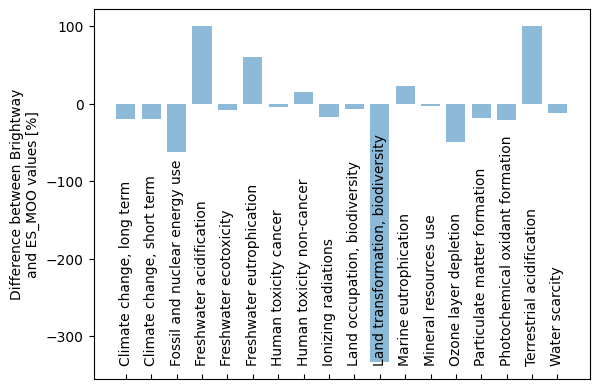

In [10]:
plot_comparison(comparison_wind_midpoints)

### Endpoints

In [11]:
comparison_wind_aop = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="aop", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use)
display(comparison_wind_aop)

,es_moo,brightway,delta
Human health,-1.285270e+03,1.092072e+01,118.690952
Ecosystem quality,2.235928e+06,1.583996e+06,-0.411574


In [12]:
comparison_wind_endpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="endpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use)
display(comparison_wind_endpoints)

,es_moo,brightway,delta
"Climate change, human health, long term",3.765528,3.132161,-0.202214
"Climate change, human health, short term",1.194987,0.993457,-0.202857
"Human toxicity cancer, long term",0.021527,0.020571,-0.046466
"Human toxicity cancer, short term",3.450636,3.306525,-0.043584
"Human toxicity non-cancer, long term",0.677077,0.645476,-0.048958
"Human toxicity non-cancer, short term",0.237191,0.430242,0.448703
"Ionizing radiation, human health",0.002194,0.001880,-0.167260
Ozone layer depletion,0.000317,0.000222,-0.431640
Particulate matter formation,1.103194,0.932597,-0.182927
Photochemical oxidant formation,0.000261,0.000216,-0.207892


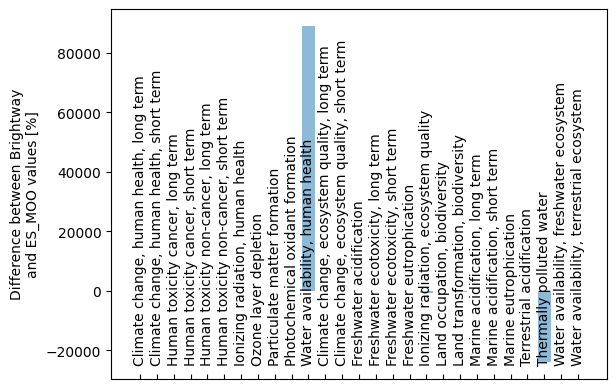

In [13]:
plot_comparison(comparison_wind_endpoints)

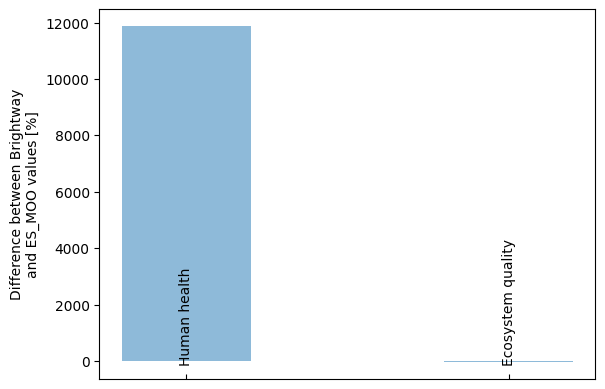

In [14]:
plot_comparison(comparison_wind_aop)

## NEW_HYDRO_DAM

Hydro dams ES unit are [GW] for construction and [GWh] for use. In ecoinvent, construction is on [kW]. Capacity factor: 0.8

In [15]:
name = "NEW_HYDRO_DAM"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
4770,"Climate change, ecosystem quality, long term",PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.025223e-11,NEW_HYDRO_DAM,RoW
4771,"Climate change, ecosystem quality, short term",PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,9.375091e-11,NEW_HYDRO_DAM,RoW
4772,"Climate change, human health, long term",DALY,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,1.325867e-16,NEW_HYDRO_DAM,RoW
4773,"Climate change, human health, short term",DALY,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,4.343345e-16,NEW_HYDRO_DAM,RoW
4774,"Climate change, long term",kg CO2 eq (long),8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.074859e-10,NEW_HYDRO_DAM,RoW
4775,"Climate change, short term",kg CO2 eq (short),8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,5.311585e-10,NEW_HYDRO_DAM,RoW
4776,Fossil and nuclear energy use,MJ deprived,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.790973e-06,NEW_HYDRO_DAM,RoW
4777,Freshwater acidification,PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.158824e-13,NEW_HYDRO_DAM,RoW
4778,Freshwater acidification,kg SO2 eq,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.626927e-19,NEW_HYDRO_DAM,RoW
4779,Freshwater ecotoxicity,CTUe,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.641436e-09,NEW_HYDRO_DAM,RoW


,Impact category,CF unit,tech_id,value,ES_name,ES_region
4050,"Climate change, ecosystem quality, long term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,1.596147e+10,NEW_HYDRO_DAM,RoW
4051,"Climate change, ecosystem quality, short term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,4.801045e+09,NEW_HYDRO_DAM,RoW
4052,"Climate change, human health, long term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,7.267269e+04,NEW_HYDRO_DAM,RoW
4053,"Climate change, human health, short term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,2.218864e+04,NEW_HYDRO_DAM,RoW
4054,"Climate change, long term",kg CO2 eq (long),a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,2.605187e+10,NEW_HYDRO_DAM,RoW
...,...,...,...,...,...,...
4135,Thermally polluted water,PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,9.935924e+06,NEW_HYDRO_DAM,RoW
4136,"Water availability, freshwater ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,8.450543e+04,NEW_HYDRO_DAM,RoW
4137,"Water availability, human health",DALY,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,-2.763403e+07,NEW_HYDRO_DAM,RoW
4138,"Water availability, terrestrial ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,5.510823e+05,NEW_HYDRO_DAM,RoW


## BUS_EV

In [16]:
name = "BUS_EV"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
315,"Climate change, ecosystem quality, long term",PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,3.312468e-10,BUS_EV,GLO
316,"Climate change, ecosystem quality, short term",PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.039257e-10,BUS_EV,GLO
317,"Climate change, human health, long term",DALY,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.507917e-15,BUS_EV,GLO
318,"Climate change, human health, short term",DALY,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,4.803196e-16,BUS_EV,GLO
319,"Climate change, long term",kg CO2 eq (long),ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,5.489405e-10,BUS_EV,GLO
320,"Climate change, short term",kg CO2 eq (short),ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,5.872882e-10,BUS_EV,GLO
321,Fossil and nuclear energy use,MJ deprived,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,9.574822e-09,BUS_EV,GLO
322,Freshwater acidification,PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,6.270698e-12,BUS_EV,GLO
323,Freshwater acidification,kg SO2 eq,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,7.620993e-18,BUS_EV,GLO
324,Freshwater ecotoxicity,CTUe,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.843368e-07,BUS_EV,GLO


,Impact category,CF unit,tech_id,value,ES_name,ES_region
6030,"Climate change, ecosystem quality, long term",PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,3.466442e+03,BUS_EV,RoW
6031,"Climate change, ecosystem quality, short term",PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,1.090100e+03,BUS_EV,RoW
6032,"Climate change, human health, long term",DALY,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,1.577987e-02,BUS_EV,RoW
6033,"Climate change, human health, short term",DALY,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,5.038028e-03,BUS_EV,RoW
6034,"Climate change, long term",kg CO2 eq (long),l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,5.739137e+03,BUS_EV,RoW
6035,"Climate change, short term",kg CO2 eq (short),l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,6.160183e+03,BUS_EV,RoW
6036,Fossil and nuclear energy use,MJ deprived,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,9.534047e+04,BUS_EV,RoW
6037,Freshwater acidification,PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,6.534889e+01,BUS_EV,RoW
6038,Freshwater acidification,kg SO2 eq,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,7.956094e-05,BUS_EV,RoW
6039,Freshwater ecotoxicity,CTUe,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,2.053611e+06,BUS_EV,RoW


## CEMENT_PROD